In [1]:
# Dependencies

from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Connect to the database
# Note: this assumes the fires database exists

rds_connection_string = "root:12345678@127.0.0.1/fires"
engine = create_engine(f'mysql+pymysql://{rds_connection_string}')


### Get data

Note that we're leaving out days with no fires or very small fires

In [3]:
# Read data into a dataframe & take a look

data = pd.read_sql("select * from acres_and_air_data where size > 10000", con=engine)
data.head()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


,index,date,overall_aqi,site_name,year,size
0,6,2001-01-07,150,San Francisco,2001,10363.2
1,185,2001-07-05,25,San Francisco,2001,21693.2
2,228,2001-08-17,52,San Francisco,2001,69333.7
3,231,2001-08-20,21,San Francisco,2001,27560.1
4,232,2001-08-21,16,San Francisco,2001,34662.9


In [4]:
# Drop the unnecessary columns and sort by acres

data = data[['date', 'overall_aqi', 'size']]
data.columns = ["date", "air_quality", "acres_burned"]
data.head()

,date,air_quality,acres_burned
0,2001-01-07,150,10363.2
1,2001-07-05,25,21693.2
2,2001-08-17,52,69333.7
3,2001-08-20,21,27560.1
4,2001-08-21,16,34662.9


##### Spot-check a couple random values from our dataframe

pick a few random values from our dataframe

In [22]:
data.sort_values(by=['date'], inplace=True, ascending=False)


In [23]:
data.head(30)

,date,air_quality,acres_burned
132,2014-10-08,50,32498.74
131,2014-09-30,38,115283.52
130,2014-09-25,37,33774.81
129,2014-09-09,48,12540.51
128,2014-08-24,37,48456.10
127,2014-08-18,33,17903.93
126,2014-08-15,40,31891.54
125,2014-08-13,42,13203.71
124,2014-08-12,39,18641.02
123,2014-07-26,56,12682.53


##### Find the same values in the earlier data
find those same values from aqi_data and wildfire_data

In [7]:
temp = pd.read_sql("select * from aqi_data", con=engine)
temp.head()

,date,overall_aqi,site_name,year
0,2001-01-01,153,San Francisco,2001
1,2001-01-02,140,San Francisco,2001
2,2001-01-03,140,San Francisco,2001
3,2001-01-04,107,San Francisco,2001
4,2001-01-05,124,San Francisco,2001


In [8]:
temp[temp['date'] == '2012-10-22']

,date,overall_aqi,site_name,year
4309,2012-10-22,37,San Pablo,2012


In [9]:
wildfire = pd.read_sql("select * from wildfire_data", con=engine)

In [10]:
wildfire.head()

,index,fire_id,fire_name,discovery_date,containment_date,size,class,fire_year,lat,long
0,0,0,FOUNTAIN,2005-02-02,2005-02-02,0.10,A,2005,40.036944,-121.005833
1,1,1,PIGEON,2004-05-12,2004-05-12,0.25,A,2004,38.933056,-120.404444
2,2,2,SLACK,2004-05-31,2004-05-31,0.10,A,2004,38.984167,-120.735556
3,3,3,DEER,2004-06-28,2004-07-03,0.10,A,2004,38.559167,-119.913333
4,4,4,STEVENOT,2004-06-28,2004-07-03,0.10,A,2004,38.559167,-119.933056


In [11]:
wildfire[wildfire['containment_date'] == '2012-10-22']



,index,fire_id,fire_name,discovery_date,containment_date,size,class,fire_year,lat,long
79650,79650,79650,MILE,2012-10-21,2012-10-22,0.20,A,2012,38.788611,-120.194167
80132,80132,80132,PICNIC,2012-10-22,2012-10-22,0.25,A,2012,34.086667,-116.928611
81174,81174,81174,RUSH,2012-08-12,2012-10-22,315578.80,G,2012,40.615300,-120.115300


In [12]:
# Assign the data to X and y

X = data[["acres_burned"]]
y = data["air_quality"].values.reshape(-1,1)
print(X.shape, y.shape)

(133, 1) (133, 1)


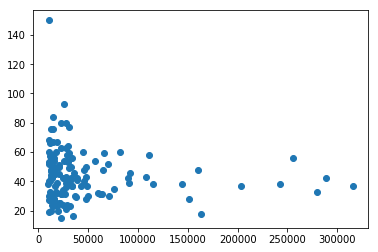

In [13]:
plt.scatter(X,y)

In [14]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [15]:
# Create the model using LinearRegression

model = LinearRegression()



In [16]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.011137667232475668
Testing Score: 0.00937498449899965
